In [19]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier


df = pd.read_csv('blooddonation.csv')

In [20]:
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,Result
0,1,1,11.280000,34.0,23.000000,1,1,0,45961,48071,251.008532,2,1,1,0
1,2,0,9.750000,54.0,33.000000,1,0,0,26106,25333,205.000000,3,0,0,0
2,3,1,10.790000,70.0,49.000000,0,0,0,9995,29465,67.000000,2,1,0,0
3,4,0,11.000000,71.0,50.000000,0,0,0,10635,7439,242.000000,1,1,0,0
4,5,1,14.170000,52.0,19.000000,0,0,0,15619,49644,397.000000,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,3008,0,12.348883,52.0,29.579169,1,0,0,20729,30463,230.000000,1,0,0,1
3008,3009,0,15.606396,55.0,38.020819,1,0,0,20729,30463,230.000000,1,0,0,1
3009,3010,0,14.440745,55.0,29.321491,1,0,0,20729,30463,230.000000,1,0,0,1
3010,3011,0,16.463681,50.0,38.070336,1,0,0,20729,30463,230.000000,1,0,0,1


In [3]:
df.isna().sum()


Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Age                              1
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
Result                           0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isna().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
Result                           0
dtype: int64

In [6]:
display(df.duplicated().sum())

0

In [7]:
import pandas as pd
df = df.drop('Patient_Number', axis=1)
df = df.drop('Physical_activity', axis=1)
df = df.drop('salt_content_in_the_diet', axis=1)
df = df.drop('alcohol_consumption_per_day', axis=1)
df = df.drop('Level_of_Stress', axis=1)

In [8]:
df.isna().sum()

Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
Result                           0
dtype: int64

In [9]:
from sklearn.utils import shuffle 
ds = shuffle(df,random_state =33)
ds.head(30)

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Age,BMI,Sex,Pregnancy,Smoking,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,Result
2867,0,18.975312,21.0,27.621600,0,0,0,0,0,1
456,1,8.910000,29.0,48.000000,1,0,0,1,1,0
2344,0,13.650461,35.0,31.096918,1,0,0,0,0,1
788,1,9.810000,28.0,31.000000,0,0,0,1,1,0
1577,0,11.720000,42.0,12.000000,0,0,1,0,0,0
1377,0,11.920000,68.0,11.000000,0,0,1,1,0,0
2421,0,15.036955,6.0,17.874591,0,0,0,0,0,1
1760,0,13.990000,33.0,34.000000,1,0,1,0,0,0
1020,0,11.300000,63.0,35.000000,1,0,1,0,1,0
2686,0,13.626912,36.0,31.127625,1,0,0,0,0,1


In [10]:
features = ["Blood_Pressure_Abnormality", "Level_of_Hemoglobin", "Age", "BMI", "Sex", "Pregnancy", "Smoking",
            "Chronic_kidney_disease", "Adrenal_and_thyroid_disorders"]

X = ds[features]
y = ds["Result"]
X

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Age,BMI,Sex,Pregnancy,Smoking,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
2867,0,18.975312,21.0,27.621600,0,0,0,0,0
456,1,8.910000,29.0,48.000000,1,0,0,1,1
2344,0,13.650461,35.0,31.096918,1,0,0,0,0
788,1,9.810000,28.0,31.000000,0,0,0,1,1
1577,0,11.720000,42.0,12.000000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
57,1,8.440000,75.0,12.000000,1,0,0,1,0
2706,0,13.393634,35.0,25.693843,1,0,0,0,0
578,1,16.480000,45.0,34.000000,0,0,1,1,0
1752,1,14.600000,21.0,47.000000,0,0,0,1,1


In [11]:
import numpy as np

# Check for NaN values in X_train and y_train
print(np.isnan(X).sum())
print(np.isnan(y).sum())



Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64
0


In [12]:
display(ds.dtypes)

Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Age                              float64
BMI                              float64
Sex                                int64
Pregnancy                          int64
Smoking                            int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
Result                             int64
dtype: object

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


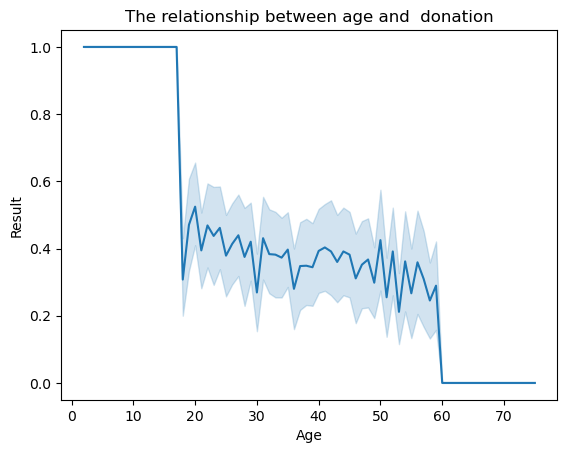

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot( x= 'Age', y= 'Result', data= ds)

plt.xlabel('Age')
plt.ylabel('Result')
plt.title('The relationship between age and  donation')

plt.show()

# SVC

## Ex1

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgboost_model = SVC()
xgboost_model.fit(X_train, y_train)



train_score = xgboost_model.score(X_train, y_train)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')

test_score = xgboost_model.score(X_test, y_test)
print(f'The Accuracy of testing: {round(test_score*100, 2)} %')


The Accuracy of training: 92.77 %
The Accuracy of testing: 92.21 %


# Ex2

In [18]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model_svm = svm.SVC()


model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of SVM is: {round(accuracy * 100, 2)} %")


Accuracy of SVM is: 92.21 %


# Ex3

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear', C = 1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9850746268656716


# Ex4

In [16]:
SVM_model = SVC()
SVM_model.fit(X_train, y_train)
y_pred_SVM = SVM_model.predict(X_test)

accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print(f"SVM Accuracy: {accuracy_SVM:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_SVM))


SVM Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       395
           1       0.85      0.93      0.89       208

    accuracy                           0.92       603
   macro avg       0.91      0.92      0.92       603
weighted avg       0.93      0.92      0.92       603



# Ex5

In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
linear_predictions = linear_svm.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_predictions)
print(linear_accuracy)

0.9834162520729685


# Ex6

In [18]:
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = svm.SVC(kernel='linear') 


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9817578772802653
Precision: 0.9587155963302753
Recall: 0.990521327014218


# Ex7

In [19]:
from sklearn.model_selection import GridSearchCV, train_test_split

svm_model = svm.SVC()
param_grid = {
    'C': [0.1, 1, 10],          
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale', 'auto']   
}

# Perform grid search
grid_search = GridSearchCV(svm_model, param_grid, cv=4)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_svm_model = svm.SVC(**best_params)
best_svm_model.fit(X_train, y_train)
train_score = best_svm_model.score(X_train, y_train)
test_score = best_svm_model.score(X_test, y_test)
print(f'The Accuracy : {round(test_score*100, 2)} %')

print("Best Hyperparameters:", best_params)


The Accuracy : 98.34 %
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


# XGBoost 

# Ex1

In [20]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)


train_score = xgboost_model.score(X_train, y_train)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')

test_score = xgboost_model.score(X_test, y_test)
print(f'The Accuracy of testing: {round(test_score*100, 2)} %')


The Accuracy of training: 100.0 %
The Accuracy of testing: 99.0 %


# Ex2

In [21]:

model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_xgb.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy of XGBClassifier on training set: {round(accuracy_train * 100, 2)} %")
print(f"Accuracy of XGBClassifier on testing set: {round(accuracy_test * 100, 2)} %")



Accuracy of XGBClassifier on training set: 100.0 %
Accuracy of XGBClassifier on testing set: 99.0 %


# Ex3

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.67%


# EX4

In [47]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))  


Accuracy: 0.9900497512437811

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       392
           1       0.98      0.99      0.99       211

    accuracy                           0.99       603
   macro avg       0.99      0.99      0.99       603
weighted avg       0.99      0.99      0.99       603



# Ex5

In [23]:
from sklearn.model_selection import GridSearchCV
xgboost_model = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}
grid_search = GridSearchCV(xgboost_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_xgboost_model = XGBClassifier(**best_params)
best_xgboost_model.fit(X_train, y_train)
train_score = best_xgboost_model.score(X_train, y_train)
test_score = best_xgboost_model.score(X_test, y_test)
print(f'The Accuracy : {round(test_score*100, 2)} %')
print("Best Hyperparameters:", best_params)


The Accuracy : 99.67 %
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


# LogisticRegression

# Ex1

In [24]:

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.67%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Ex2

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


logisticRegr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 98.67%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Ex3

In [26]:
 from sklearn.metrics import roc_auc_score
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(random_state = 13,class_weight = 'balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = roc_auc_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 98.51%


# Ex4

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
model_logreg = LogisticRegression(C=1.0, max_iter=100)

model_logreg.fit(X_train, y_train)

y_pred = model_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression is: {round(accuracy * 100, 2)} %")

Accuracy of Logistic Regression is: 98.34 %


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Ex5

In [28]:
from xgboost import XGBClassifier
xgboost_model = LogisticRegression()
xgboost_model.fit(X_train, y_train)


train_score = xgboost_model.score(X_train, y_train)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')

test_score = xgboost_model.score(X_test, y_test)
print(f'The Accuracy of testing: {round(test_score*100, 2)} %')


The Accuracy of training: 98.55 %
The Accuracy of testing: 98.34 %


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Ex6

In [29]:
from sklearn.metrics import mean_squared_error
model = LogisticRegression(solver='newton-cg', max_iter=150)
model.fit(X_train, y_train)
pred2 = model.predict(X_test)
accuracy2 = mean_squared_error(y_test, pred2)
print(accuracy2)

0.01658374792703151


# Ex7

In [30]:
logisticRegr = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
}
grid_search = GridSearchCV(logisticRegr, param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_logisticRegr = LogisticRegression(**best_params)
best_logisticRegr.fit(X_train, y_train)
predictions = best_logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Best Hyperparameters:", best_params)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 98.67%
Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

# Prediction

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logr = XGBClassifier()
logr.fit(X_train, y_train)

input_data = np.array([1,14.28, 44,21,1 ,0.0,1,1,0])

predicted = logr.predict(input_data.reshape(1, -1))

print("Predicted:", predicted)


Predicted: [0]


# DecisionTreeClassifier

# Ex1

In [57]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       594
           1       0.99      0.98      0.98       310

    accuracy                           0.99       904
   macro avg       0.99      0.99      0.99       904
weighted avg       0.99      0.99      0.99       904



# Ex2

In [58]:

clf = DecisionTreeClassifier(criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.952433628318584


# Ex3

In [59]:
xgboost_model = DecisionTreeClassifier()
xgboost_model.fit(X_train, y_train)


train_score = xgboost_model.score(X_train, y_train)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')

test_score = xgboost_model.score(X_test, y_test)
print(f'The Accuracy of testing: {round(test_score*100, 2)} %')


The Accuracy of training: 100.0 %
The Accuracy of testing: 98.56 %


# Ex4

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
decision_tree_reg = DecisionTreeClassifier()

decision_tree_reg.fit(X_train, y_train)

y_pred_reg = decision_tree_reg.predict(X_test)


mse = mean_squared_error(y_test, y_pred_reg)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.02


# Ex5

In [61]:
decision_tree_model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_decision_tree_model = DecisionTreeClassifier(**best_params)
best_decision_tree_model.fit(X_train, y_train)
y_pred_dt = best_decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Best Hyperparameters:", best_params)


Decision Tree Accuracy: 0.99
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}


# RandomForestRegressor

# Ex1

In [62]:
model_r = RandomForestClassifier()

model_r.fit(X_train, y_train)

accuracy_train = model_r.score(X_train, y_train)
y_pred = model_r.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RandomForestRegressor  is: {accuracy}")

Accuracy of RandomForestRegressor  is: 0.9922566371681416


# Ex2

In [63]:
model_r = RandomForestRegressor(n_estimators=100)

model_r.fit(X_train, y_train)

accuracy_train = model_r.score(X_test, y_test)
y_pred = model_r.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print(f"Accuracy of RandomForestRegressor  is: {round(accuracy_train * 100, 2)} %")

Accuracy of RandomForestRegressor  is: 96.99 %


# Ex3

In [64]:
xgboost_model = RandomForestClassifier()
xgboost_model.fit(X_train, y_train)


train_score = xgboost_model.score(X_train, y_train)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')

test_score = xgboost_model.score(X_test, y_test)
print(f'The Accuracy of testing: {round(test_score*100, 2)} %')



The Accuracy of training: 100.0 %
The Accuracy of testing: 99.23 %


# Ex4

In [65]:
rf = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9911504424778761


# Ex5

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error of Model 2:", mse)


Mean Squared Error of Model 2: 0.007059402654867256


In [67]:
model_r = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(model_r, param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_r = RandomForestRegressor(**best_params)
best_model_r.fit(X_train, y_train)
accuracy_train = best_model_r.score(X_test, y_test)
y_pred = best_model_r.predict(X_test)
accuracy = r2_score(y_test, y_pred)

print(f"Accuracy of RandomForestRegressor is: {round(accuracy * 100, 2)} %")
print("Best Hyperparameters:", best_params)


Accuracy of RandomForestRegressor is: 96.93 %
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


# Ex6

# Prediction

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
input_data = np.array([13,16.4,31,50,0,0,1,0,1])
predicted = rf_classifier.predict(input_data.reshape(1, -1))

print("Predicted:", predicted)


Predicted: [0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# naive_bayes

# Ex1

In [69]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9236725663716814


# Ex2

In [70]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9480088495575221
